# Анализ рынка недвижимости

### Importing libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Откроем файл с данными и изучимобщую информацию. 

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
pd.set_option('display.max_columns', 50) 
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


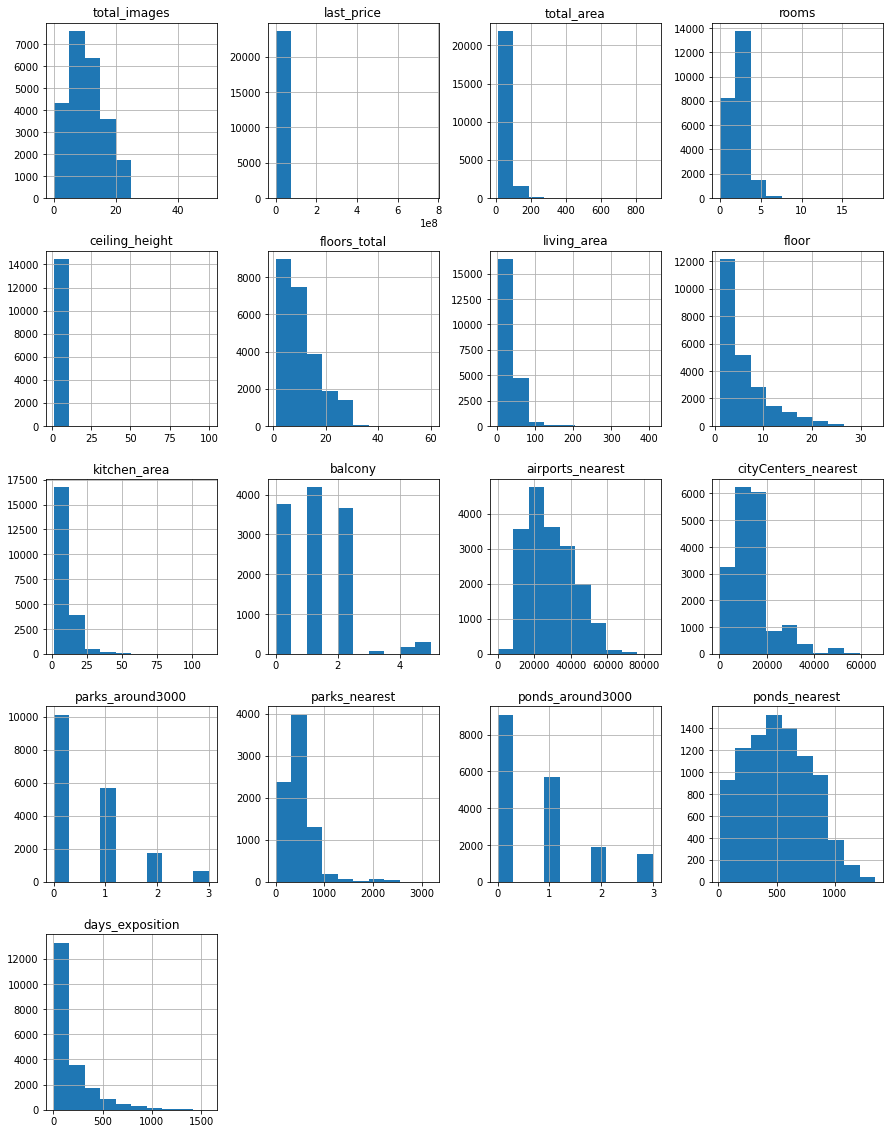

In [5]:
data.hist(figsize=(15, 20))

None

In [6]:
data.first_day_exposition = pd.to_datetime(arg = data.first_day_exposition, format='%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [7]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Предобработка данных

In [8]:
data.last_price = data.last_price.astype(int)
data.is_apartment = data.is_apartment.astype(bool)

Продается комната на третьем этаже аэропорта, в котором 9 этажей?

In [9]:
data.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000,34.7,2018-09-23,1,2.7,9.0,19.8,3,True,False,False,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


In [10]:
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [11]:
data.loc[data.ponds_around3000.isna()]['locality_name'].unique()

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
 

Изучив примеры пропусков картографических данных - видно, что около данные о 5518 являются пропущенными, по той причине, что объекты находятся в деревнях, и посёлках, всвязи с чем - данные вычеслены быть не могут.

In [12]:
tmp_data = data.dropna(subset=['ponds_around3000'])
tmp_data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,True,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,True,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Проверяем то место, которое не является посёлком, или деревней, но не имеет данных по расстоянию до центра города.

In [13]:
tmp_data.loc[tmp_data.cityCenters_nearest.isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20190,2,10500000,85.0,2019-01-08,3,3.0,3.0,55.5,2,True,False,False,8.0,1.0,Пушкин,15527.0,NaN,1.0,134.0,0.0,NaN,NaN


Видимо возникли проблемы с вычислением расстояния.

Пропуски в графе ceiling_height скорее всего связаны с тем, что хозяева не знают какой высоты у них потолок.

In [14]:
data.ceiling_height.describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Максимальная высота потолков выглядит подозрительно, поэтому стоит посмотреть на данные о квартирах с высотой потолков выше 4 метров.

In [15]:
data.loc[data.ceiling_height > 4]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
154,1,8200000,80.0,2018-11-06,3,4.15,3.0,44.2,2,True,False,False,12.2,NaN,Санкт-Петербург,20562.0,3167.0,2.0,344.0,1.0,838.0,38.0
355,17,3600000,55.2,2018-07-12,2,25.00,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
464,15,66571000,280.3,2015-06-11,6,5.20,8.0,159.5,7,True,False,False,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000,310.0,2018-10-12,5,5.30,3.0,190.0,3,True,False,False,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1053,13,550000,29.0,2018-02-01,1,5.00,3.0,NaN,1,False,False,False,NaN,NaN,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22309,20,5300000,45.0,2017-09-30,1,10.30,16.0,15.5,15,True,False,False,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22336,19,9999000,92.4,2019-04-05,2,32.00,6.0,55.5,5,False,False,False,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
22494,7,91075000,491.0,2017-05-27,5,4.20,9.0,274.0,9,True,False,False,45.0,0.0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,115.0
22869,0,15000000,25.0,2018-07-25,1,100.00,5.0,14.0,5,True,False,False,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


У нас 75 квартир с потолками выше 4 метров. Данные квартиры можно просто откинуть.

In [16]:
data.drop(data.loc[data.ceiling_height > 4].index, inplace=True)
data.loc[data.ceiling_height > 4] # Testing if we drop all we needed.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Аналогично с потолками ниже 2.5 метров.

In [17]:
data.drop(data.loc[data.ceiling_height < 2.5].index, inplace=True)
data.loc[data.ceiling_height < 2.5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [18]:
data.ceiling_height.fillna(data.ceiling_height.median(), inplace=True)

In [19]:
data.reset_index(drop=True,inplace=True)

Скорее всего данные о количестве балконов были пропущены при их отсутсвии, также, возможно, были пропущены и данные о принадлежности квартиры к классу апартаментов. В столбцах, заполненных программой, про географическое положение - пропуски скорее всего были образованы потому, что в программе есть максимальный радиус поиска, и при превышении этого значение - в ячейке оставался пропуск.

Заполняем пропуски в числе балконов нулями.

In [20]:
data.balcony.fillna(0, inplace=True)

In [21]:
data.balcony.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23551 entries, 0 to 23550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23551 non-null  int64         
 1   last_price            23551 non-null  int64         
 2   total_area            23551 non-null  float64       
 3   first_day_exposition  23551 non-null  datetime64[ns]
 4   rooms                 23551 non-null  int64         
 5   ceiling_height        23551 non-null  float64       
 6   floors_total          23465 non-null  float64       
 7   living_area           21660 non-null  float64       
 8   floor                 23551 non-null  int64         
 9   is_apartment          23551 non-null  bool          
 10  studio                23551 non-null  bool          
 11  open_plan             23551 non-null  bool          
 12  kitchen_area          21293 non-null  float64       
 13  balcony         

Удаляем "городской", и "городского типа" из названия посёлков во избежании неявных дубликатов.

In [22]:
len(data.locality_name.unique())

363

In [23]:
data.locality_name = data.locality_name.str.replace('городского типа ', '')
data.locality_name = data.locality_name.str.replace('городской ', '')
data.locality_name = data.locality_name.str.replace('коттеджный ', '')
data.locality_name = data.locality_name.str.strip()

In [24]:
len(data.locality_name.unique())

358

При написании слова посёлок - иногда используется буква "е", приведем всё к одному варианту написания.

In [25]:
data.locality_name = data.locality_name.str.replace('ё', 'е')

In [26]:
len(data.locality_name.unique())

320

In [27]:
data.locality_name.fillna('n/a', inplace=True)

При первой проверке  "посёлок Янино-1" встретился дважды, поэтому для удобства - сортируем уникальные значения названий населенных пунктов.

In [28]:
uniques = data.locality_name.unique()
uniques.sort()
print(uniques, '\n', len(uniques))

['n/a' 'Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалево' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'деревня Агалатово' 'деревня Аро' 'деревня Батово'
 'деревня Бегуницы' 'деревня Белогорка' 'деревня Большая Вруда'
 'деревня Большая Пустомержа' 'деревня Большие Колпаны'
 'деревня Большое Рейзино' 'деревня Большой Сабск' 'деревня Бор'
 'деревня Борисова Грива' 'деревня Ваганово' 'деревня Вартемяги'
 'деревня Вахнова Кара' 'деревня Выскатка' 'деревня Гарболово'
 'деревня Глинка' 'деревня Горбунки' 'деревня Гостилицы'
 'деревня Заклинье' 'деревня Заневка' 'деревня Зимитицы' 'деревня

In [29]:
data = data.dropna(subset=['floors_total']).reset_index(drop=True)

In [30]:
data.is_apartment.fillna(False, inplace=True)

#### Преобразование типов

In [31]:
data.parks_around3000 = data.parks_around3000.fillna(0).astype(int)

data.ponds_around3000 = data.ponds_around3000.fillna(0).astype(int)

In [32]:
data.last_price = data.last_price.astype(int)

data.is_apartment = data.is_apartment.astype(bool)

data.floors_total = data.floors_total.astype(int)

Оцениваем границы ценового диапазона, для исключения выбросов

In [33]:

low_percentele = 0.01
high_percentele = 0.99

last_price_low = data['last_price'].quantile(low_percentele)
last_price_high = data['last_price'].quantile(high_percentele)

print(f'Нижняя граница last_price {last_price_low}')
print(f'Верхняя граница last_price {last_price_high}')

print(
    'Процент отброшенных значений = ',
    round(
        100 - len(data.query('@last_price_low <= last_price <= @last_price_high'))
        / len(data['last_price']) * 100,
        2
    ),
    '%'
)

Нижняя граница last_price 1000000.0
Верхняя граница last_price 35000000.0
Процент отброшенных значений =  1.94 %


In [34]:
data = data.drop(data.loc[data.last_price < last_price_low].index)
data = data.drop(data.loc[data.last_price > last_price_high].index)

In [35]:
data.duplicated().sum()

0

In [36]:
print(data.isna().sum(), end='\n\n')
print(data.info())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1788
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2138
balcony                     0
locality_name               0
airports_nearest         5253
cityCenters_nearest      5233
parks_around3000            0
parks_nearest           15200
ponds_around3000            0
ponds_nearest           14196
days_exposition          3046
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23010 entries, 0 to 23464
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23010 non-null  int64         
 1   last_price            23010 non-null  

days_exposition скорее всего содержит пропуски из-за того, что объявления еще не сняты

#### Вывод после предобработки

При предобработке были сокращены все названия поселков, путём убирания пояснительных слов("коттеджный", "городского типа", и т.д.), и замены буквы "ё" на "е". Таким образом удалось избежать неявных дубликатов. Также частично были устранены пропуски, где это возможно. В столбце с высотой потолков были использованы медианные значения, для заполнения пропусков. В столбце с балконами - было решено что причиной пропусков стало отсутствие балконов, так что они были заполнены нулями. Графа с датой снятия объявления имеет пропуски, теоретически, из-за не снятия объявления. Пропуски в географических данных обусловлены, предположительно, отсутсвием географических объектов, до которых измеряется расстояние. Пропуски в данных с площадями - оставлены как есть, по причине нехватки информации для их закрытия.

### Посчитайте и добавьте в таблицу новые столбцы

In [37]:
# Добавляем столбец со стоимостью квадратного метра
data['price_per_m'] = data.last_price / data.total_area
# Столбец дней недели
data['weekday'] = data.first_day_exposition.dt.weekday
# Столбец с месяцами
data['month'] = data.first_day_exposition.dt.month
# Столбец с годами
data['year'] = data.first_day_exposition.dt.year
# Функция для группировки этажей, и применение её для создания нового столбца
def grouping_floors(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else: return 'другой'
    
data['floor_type'] = data.apply(grouping_floors, axis=1)
# Столбец с километражом до центра города
data['km_to_city_center'] = round(data['cityCenters_nearest'] / 1000)


In [38]:
data['km_to_city_center'].head()

0    16.0
1    19.0
2    14.0
4     8.0
5     NaN
Name: km_to_city_center, dtype: float64

### Проведите исследовательский анализ данных

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23010 entries, 0 to 23464
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23010 non-null  int64         
 1   last_price            23010 non-null  int64         
 2   total_area            23010 non-null  float64       
 3   first_day_exposition  23010 non-null  datetime64[ns]
 4   rooms                 23010 non-null  int64         
 5   ceiling_height        23010 non-null  float64       
 6   floors_total          23010 non-null  int64         
 7   living_area           21222 non-null  float64       
 8   floor                 23010 non-null  int64         
 9   is_apartment          23010 non-null  bool          
 10  studio                23010 non-null  bool          
 11  open_plan             23010 non-null  bool          
 12  kitchen_area          20872 non-null  float64       
 13  balcony         

total_area


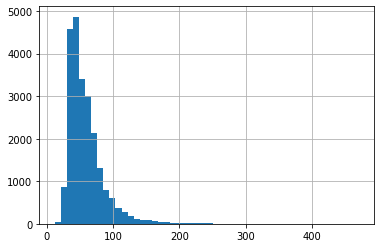

rooms


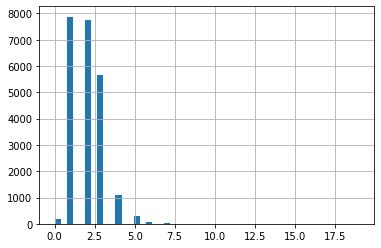

ceiling_height


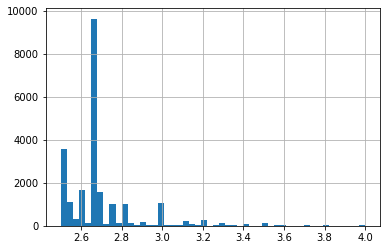

floors_total


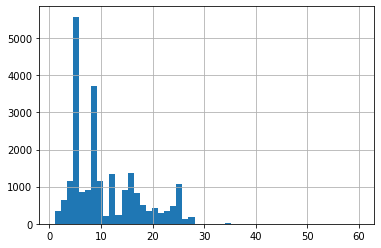

living_area


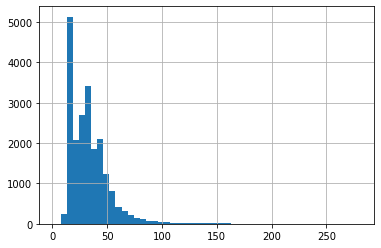

airports_nearest


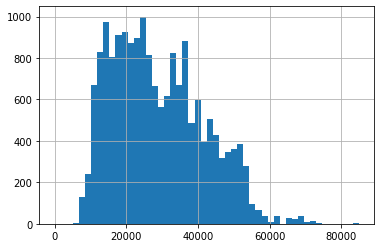

cityCenters_nearest


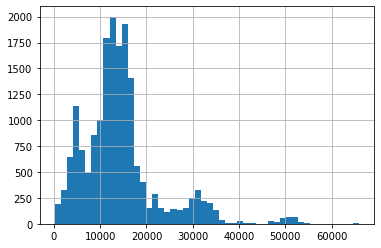

parks_nearest


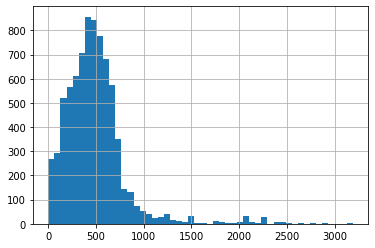

weekday


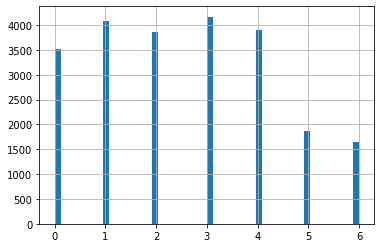

month


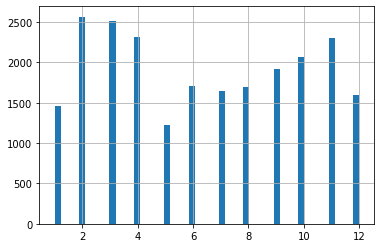

floor_type


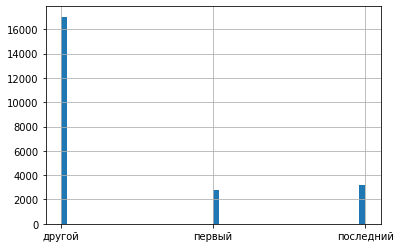

In [40]:
columns = ['total_area',
        'rooms', 'ceiling_height', 'floors_total', 'living_area',
        'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 
        'weekday', 'month', 'floor_type']

for column in columns:
    print(column)
    data[column].hist(bins=50)
    plt.show()
    
None
# не работает проход в цикле, будто строит на одной плоскости всё

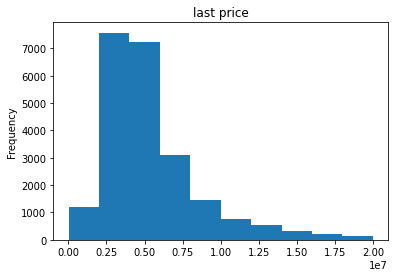

In [41]:
data.last_price.plot(kind='hist', title='last price', range=(10000, 20000000))
None

#### Days exposition exploring.

In [42]:
data.days_exposition.describe()

count    19964.000000
mean       179.971449
std        219.199656
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

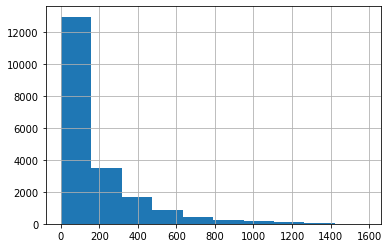

In [43]:
data.days_exposition.hist()
None

В медианном значении продажа квартиры занимает 95 дней, при этом есть и продажи меньше чем за 10 дней, что кажется аномально маленьким, также есть, напротив, продажи, более чем за 3 года, что кажется аномально высоким показателем.

#### *Изучение зависимостей*

0.7915020087321721


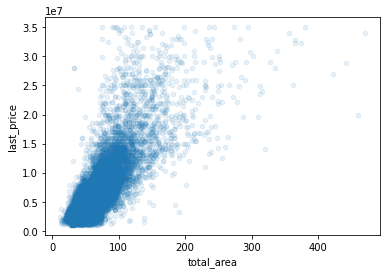

In [44]:
print(data.last_price.corr(data.total_area))
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1)

#data.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(style='o-')
None

Исходя из корреляции и графиков - можно увидеть положительную зависимость цены, от площади квартиры.

0.6988219402175992
0.9342898951693797


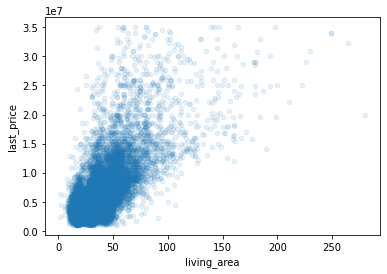

In [45]:
print(data.last_price.corr(data.living_area), data.total_area.corr(data.living_area), sep='\n')
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.1)
None
#data.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(style='o-')

Так как, что не удивительно, корреляция между общей площадью и жилой - почти 1, и корреляция с ценой сохраняется положительная.

0.6015123209215957


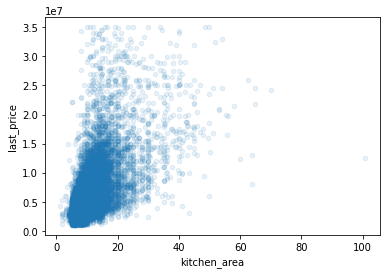

In [46]:
print(data.last_price.corr(data.kitchen_area))
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.1)
None

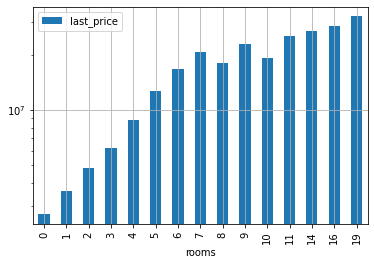

In [47]:
'''print(data.last_price.corr(data.rooms))
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.1)
None'''
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(kind='bar', grid=True, logy=True)
None

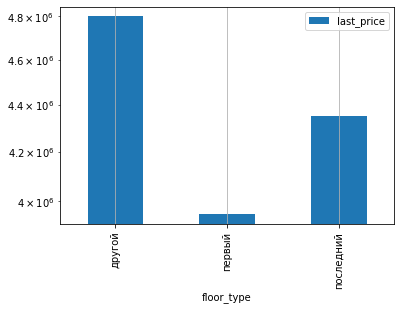

In [48]:
#data.plot(x='floor_type', y='last_price', kind='scatter')

data.pivot_table(index='floor_type', values='last_price', aggfunc='median')\
    .plot(kind='bar', grid=True, logy=True)
None

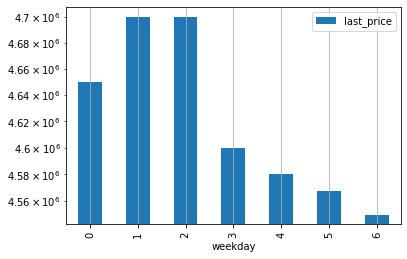

In [49]:

data.pivot_table(index='weekday', values='last_price', aggfunc='median')\
    .plot(kind='bar', grid=True, logy=True)
None

Зависимость цены от дня недели, в который было выложено объявление - отсутствует, хотя медианные значения на выходных - самые низкие, но в эти дни выкладывается и меньше объявлений.

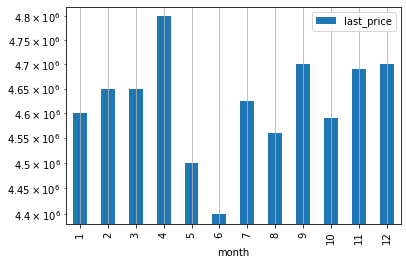

In [50]:
#print(data.last_price.corr(data.month))
#data.plot(x='month', y='last_price', kind='scatter')

data.pivot_table(index='month', values='last_price', aggfunc='median')\
    .plot(kind='bar', grid=True, logy=True)
None

Зависимости от месяца, в котором было выложено объявления - нет, что видно и из графиков, и по значению корреляции.

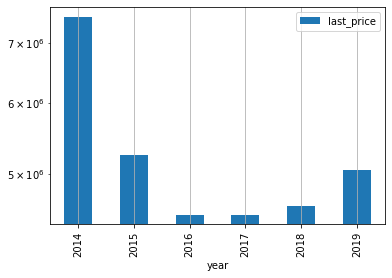

In [51]:
#print(data.last_price.corr(data.year))
#data.plot(x='year', y='last_price', kind='scatter')

data.pivot_table(index='year', values='last_price', aggfunc='median')\
    .plot(kind='bar', grid=True, logy=True)
None

Исходя из графиков видно, что всреднем за период с 2014 по 2018 года - цены на недвижимость снижались, но в 2019 чуть-чуть выросли. При этом корреляция незначительная(но отрицательная).

#### Топ 10 населенных пунктов по популярности

In [52]:
top_10 = data.locality_name.value_counts().head(10)
top_10 = pd.DataFrame({'locality_name':top_10.index, 'count':top_10}).reset_index(drop=True)
top_10

,locality_name,count
0,Санкт-Петербург,15330
1,поселок Мурино,550
2,поселок Шушары,439
3,Всеволожск,395
4,Пушкин,364
5,Колпино,336
6,поселок Парголово,326
7,Гатчина,305
8,деревня Кудрово,299
9,Выборг,230


In [53]:
grouped = data\
.pivot_table(index='locality_name', values='price_per_m', aggfunc='mean')

In [54]:
top_10 = grouped.loc[top_10.locality_name]

In [55]:
top_10 = top_10.sort_values('price_per_m', ascending=False)

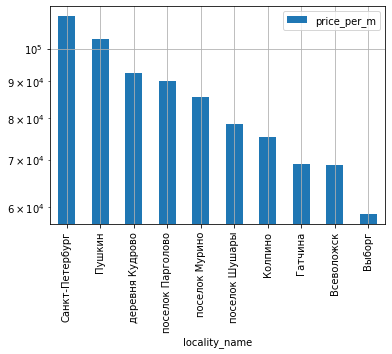

In [56]:
top_10.plot(kind='bar', grid=True, logy=True)
None

Самая низкая цена из топ 10 самых популярных населенных пунктов - Выборг, с ценой около 58000 за квадратный метр. В Санкт-Петербурге же, как в самом популярном городе - цена состовляет около 114000 за квадратный метр, что почти в два раза больше.

#### Цена за километры

In [57]:
saint_pt_data = data.query('locality_name == "Санкт-Петербург"')
saint_pt_data = saint_pt_data.filter(['locality_name','last_price','km_to_city_center'], axis=1)
saint_pt_data['price_per_km'] = saint_pt_data['last_price'] / saint_pt_data['km_to_city_center']

saint_pt_data


,locality_name,last_price,km_to_city_center,price_per_km
0,Санкт-Петербург,13000000,16.0,8.125000e+05
2,Санкт-Петербург,5196000,14.0,3.711429e+05
4,Санкт-Петербург,10000000,8.0,1.250000e+06
7,Санкт-Петербург,7915000,12.0,6.595833e+05
9,Санкт-Петербург,5400000,15.0,3.600000e+05
...,...,...,...,...
23455,Санкт-Петербург,3550000,16.0,2.218750e+05
23456,Санкт-Петербург,5500000,6.0,9.166667e+05
23457,Санкт-Петербург,9470000,4.0,2.367500e+06
23460,Санкт-Петербург,9700000,4.0,2.425000e+06


<AxesSubplot:xlabel='km_to_city_center'>

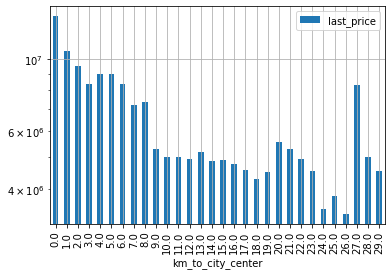

In [58]:
saint_pt_data.pivot_table(index='km_to_city_center', values='last_price', aggfunc='median')\
    .plot(kind='bar', grid=True, logy=True)

#### Промежуточный вывод

Из графика видно, что в самом центре квартиры стоят резко дороже, чем в остальном, в районе 10-20 км наблюдается самый ровный участок(плато?), а дальше цены ведут себя не однозначно, для понимания причин - нужно смотреть на другие признаки.

### Общий вывод

В ходе предобработки данные были модифицированы следующим образом:
   - Столбец `locality_name` был избавлен от неявных дубликатов, путем устранения поясняющих слов, и замены "ё" на "е".
   - Пропуски столбца `balcony` были заполнены нулями, считая что пропускают данную графу люди, не имеющие балконов.
   - Пропуски столбца `ceiling_height` были заполнены медианными значениями, также в данном столбце были замечены аномально маленькие значения (75 квартир с потолками менее 2.5м), и аномально большие (75 квартир с потолками выше 4м). Всвязи с небольшим количеством аномальных данных - данные строки были отброшены.
   - Был изменен тип данных `first_day_exposition` на соответствующий типу для хранения дат.
   - Пропуски в географических данных, соответствующие небольшим поселкам были оставлены, так как их удаление могло привести к потере значимых данных.
   - Пропуски в названиях населенных пунктов были заполнены фразой 'n/a'
   - Пропуски в графе `days_exposition` скорее всего вызваны тем, что объявления ещё актуальны
    
Также при проведении исследования были выявлены зависимости итоговой цены объекта недвижимости от таких факторов, как:
   * `total_area` – общая площадь, её увеличение напрямую влияет на увеличение стоимости недвижимости
   * `year` - виден отрицательный рост цен на недвижимость с 2014го года, который плавно перешел в положительный в 2017 году, но медианная цена 2019 года не достигла показателей 2015го
   * `rooms` - заметно что рост цены сильно замедляется после того, как количество комнат достигает 7и, но до этого - цена стабильно растет.
   
Удалось проследить сезонность публикации объявлений, так в зимние месяцы - объявлений до двух раз больше, чем летом, также и цена недвижимости выложенной летом, всреднем, ниже, того же показателя в остальные месяцы. При этом в выходные - занятие продажей недвижимости сильно теряет свою популярность(частота в сб-вс в два раза меньше чем в чт-пт), также как и цена выкладываемых в выходные объектов недвижимости - резко падает.